# Fourier Transform

$$F(u,v)=\sum_{i=0}^{N-1} \sum_{i=0}^{M-1}f(x,y) e^{-j(\frac{2 \pi}{N})ux} e^{-j(\frac{2 \pi}{M})vy}$$

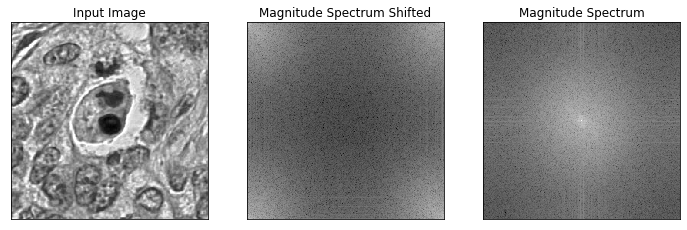

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1-2556_Brightness.tif',0)
f = np.fft.fft2(img)
ms= 20*np.log(np.abs(f))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))


plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(abs(ms), cmap = 'gray')
plt.title('Magnitude Spectrum Shifted'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# FFT Properties

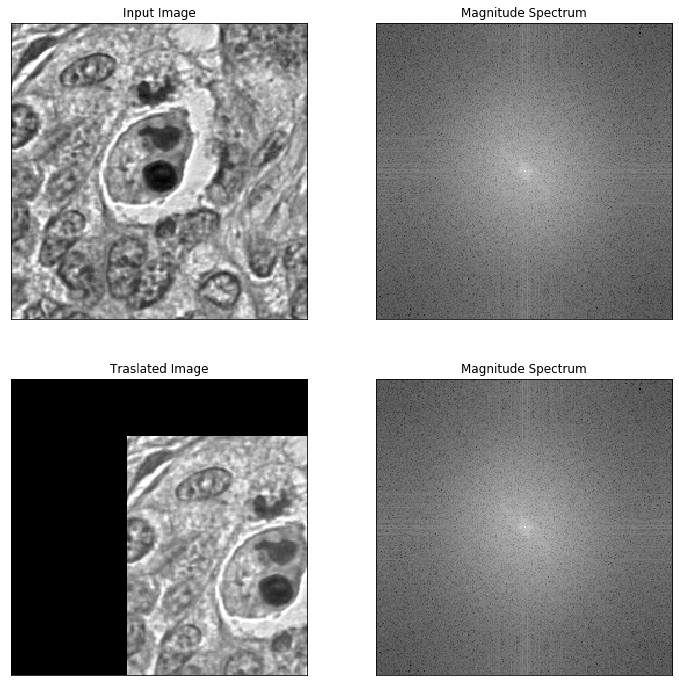

In [61]:
#Traslation

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread('images/1-2556_Brightness.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

rows,cols=img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
dst_f = np.fft.fft2(dst)
dst_fshift = np.fft.fftshift(f)
dst_magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(12,12))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(dst, cmap = 'gray')
plt.title('Traslated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(dst_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
plt.show()

# Low pass filter

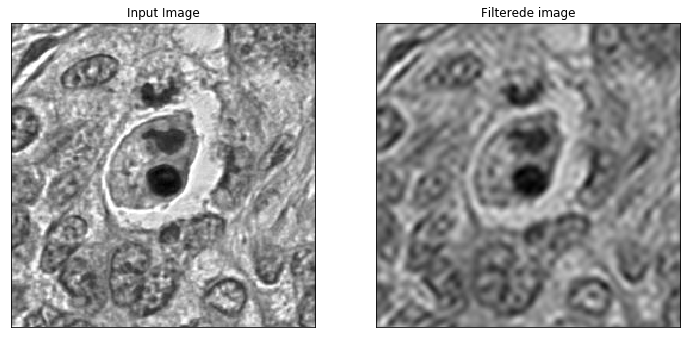

In [62]:
img = cv2.imread('images/1-2556_Brightness.tif',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-25):int(crow+25), int(ccol-25):int(ccol+25)] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.figure(figsize=(12,12))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filterede image'), plt.xticks([]), plt.yticks([])
plt.show()

# High pass filter

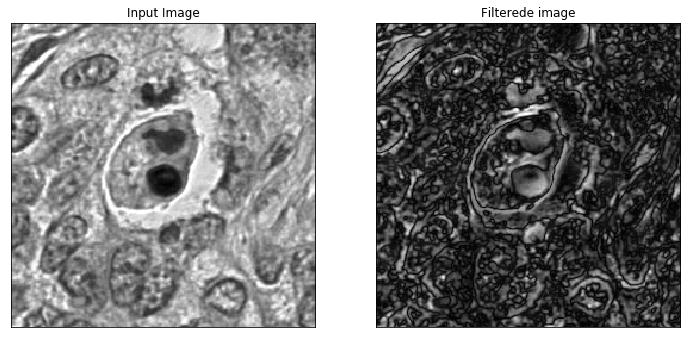

In [63]:
img = cv2.imread('images/1-2556_Brightness.tif',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.ones((rows,cols,2),np.uint8)
mask[int(crow-5):int(crow+5), int(ccol-5):int(ccol+5)] = 0

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filterede image'), plt.xticks([]), plt.yticks([])
plt.show()